# Classification: Predict Diagnosis of a Breast Tumor as Malignant or Benign

## 1. Problem Statement

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

### 1.1 Expected outcome
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Features are computed from the digitized image of the FNA of the breast mass. They describe characteristics of the cell nuclei present in the image. Use these characteristics build a model that can classify a breast cancer tumor using two categories:
* 1= Malignant (Cancerous) - Present
* 0= Benign (Not Cancerous) - Absent

### 1.2 Objective 
Since the labels in the data are discrete, the prediction falls into two categories, (i.e. Malignant or Benign). In machine learning this is a classification problem. 
        
Thus, the goal is to classify whether the breast cancer is Malignant or Benign and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

### 1.3 Get the Data
The [Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains **569 samples of malignant and benign tumor cells**. 
* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. 
* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',20)

sns.set_style('whitegrid')
random_state=23

In [73]:
data=pd.read_csv('data/data.csv',index_col=False)

In [74]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419              0.07871        1.0950      0.9053         8.589   
1         0.1812              0.05667        0.5435      0.7339         3.398   
2         0.2069              0.05999        0.7456      0.7869         4.585   
3         0.2597              0.09744        0.4956      1.1560         3.445   
4         0.1809              0.05883        0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003             0.006193          25.38          17.33   
1      0.01389             0.003532          24.99          23.41   
2      0.02250             0.004571          23.57          25.53   
3      0.05963             0.009208          14.91          26.50   
4      0.01756             0.005115          22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119               0.2654           0.4601   
1           0.2416               0.1860           0.2750   
2           0.4504               0.2430           0.3613   
3           0.6869               0.2575           0.6638   
4           0.4000               0.1625           0.2364   

   fractal_dimension_worst  
0              0.11890      
1              0.08902      
2              0.08758      
3              0.17300      
4              0.07678

In [75]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [76]:
data.drop('id',axis=1,inplace=True)

## Quick Glance on the Data

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [78]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are 569 instances in the dataset, which means that it is very small by Machine Learning standards. Notice that the none of the attributes have missing values. All attributes are numerical, except the `diagnosis` field.

**Visualizing Missing Values**

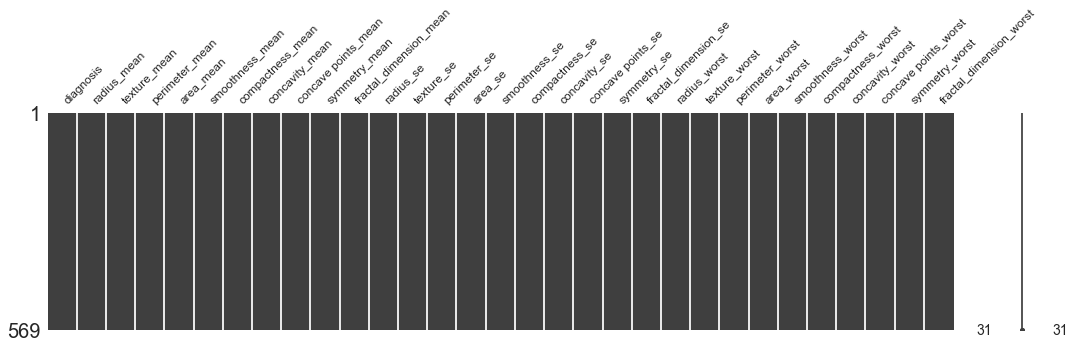

In [79]:
import missingno as msno
msno.matrix(data.sample(len(data)),figsize=(18,4),fontsize=12)

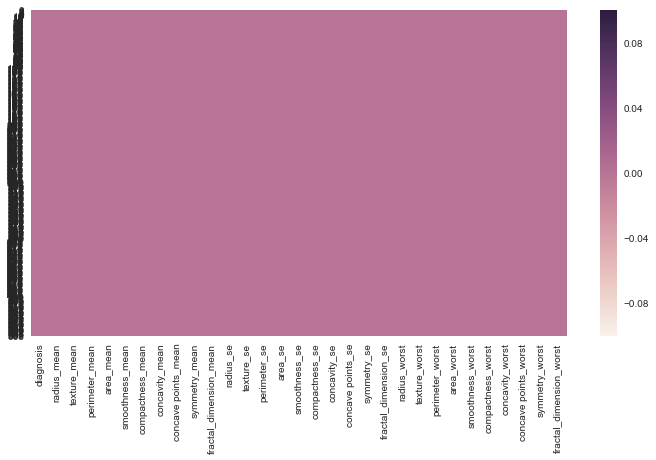

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())

In [81]:
data.get_dtype_counts()

float64    30
object      1
dtype: int64

In [82]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# 2: Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, we will be getting familiar with the data, which will provide useful knowledge for data pre-processing.

## 2.1 Objectives of Data Exploration

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

**The purpose of EDA is:**
* To use summary statistics and visualizations to better understand data, find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis.
* For data preprocessing to be successful, it is essential to have an overall picture of our data. Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.

Next step is to explore the data. There are two approaches used to examine the data using:

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

In [83]:
data.describe().transpose()

count        mean         std         min         25%  \
radius_mean           569.0   14.127292    3.524049    6.981000   11.700000   
texture_mean          569.0   19.289649    4.301036    9.710000   16.170000   
perimeter_mean        569.0   91.969033   24.298981   43.790000   75.170000   
area_mean             569.0  654.889104  351.914129  143.500000  420.300000   
smoothness_mean       569.0    0.096360    0.014064    0.052630    0.086370   
compactness_mean      569.0    0.104341    0.052813    0.019380    0.064920   
concavity_mean        569.0    0.088799    0.079720    0.000000    0.029560   
concave points_mean   569.0    0.048919    0.038803    0.000000    0.020310   
symmetry_mean         569.0    0.181162    0.027414    0.106000    0.161900   
fractal_dimension...  569.0    0.062798    0.007060    0.049960    0.057700   
radius_se             569.0    0.405172    0.277313    0.111500    0.232400   
texture_se            569.0    1.216853    0.551648    0.360200    0.833900   
perimeter_se          569.0    2.866059    2.021855    0.757000    1.606000   
area_se               569.0   40.337079   45.491006    6.802000   17.850000   
smoothness_se         569.0    0.007041    0.003003    0.001713    0.005169   
compactness_se        569.0    0.025478    0.017908    0.002252    0.013080   
concavity_se          569.0    0.031894    0.030186    0.000000    0.015090   
concave points_se     569.0    0.011796    0.006170    0.000000    0.007638   
symmetry_se           569.0    0.020542    0.008266    0.007882    0.015160   
fractal_dimension_se  569.0    0.003795    0.002646    0.000895    0.002248   
radius_worst          569.0   16.269190    4.833242    7.930000   13.010000   
texture_worst         569.0   25.677223    6.146258   12.020000   21.080000   
perimeter_worst       569.0  107.261213   33.602542   50.410000   84.110000   
area_worst            569.0  880.583128  569.356993  185.200000  515.300000   
smoothness_worst      569.0    0.132369    0.022832    0.071170    0.116600   
compactness_worst     569.0    0.254265    0.157336    0.027290    0.147200   
concavity_worst       569.0    0.272188    0.208624    0.000000    0.114500   
concave points_worst  569.0    0.114606    0.065732    0.000000    0.064930   
symmetry_worst        569.0    0.290076    0.061867    0.156500    0.250400   
fractal_dimension...  569.0    0.083946    0.018061    0.055040    0.071460   

                             50%          75%         max  
radius_mean            13.370000    15.780000    28.11000  
texture_mean           18.840000    21.800000    39.28000  
perimeter_mean         86.240000   104.100000   188.50000  
area_mean             551.100000   782.700000  2501.00000  
smoothness_mean         0.095870     0.105300     0.16340  
compactness_mean        0.092630     0.130400     0.34540  
concavity_mean          0.061540     0.130700     0.42680  
concave points_mean     0.033500     0.074000     0.20120  
symmetry_mean           0.179200     0.195700     0.30400  
fractal_dimension...    0.061540     0.066120     0.09744  
radius_se               0.324200     0.478900     2.87300  
texture_se              1.108000     1.474000     4.88500  
perimeter_se            2.287000     3.357000    21.98000  
area_se                24.530000    45.190000   542.20000  
smoothness_se           0.006380     0.008146     0.03113  
compactness_se          0.020450     0.032450     0.13540  
concavity_se            0.025890     0.042050     0.39600  
concave points_se       0.010930     0.014710     0.05279  
symmetry_se             0.018730     0.023480     0.07895  
fractal_dimension_se    0.003187     0.004558     0.02984  
radius_worst           14.970000    18.790000    36.04000  
texture_worst          25.410000    29.720000    49.54000  
perimeter_worst        97.660000   125.400000   251.20000  
area_worst            686.500000  1084.000000  4254.00000  
smoothness_worst        0.131300     0.146000     0.22260  
compactness_

## Unimodal Data Visualizations


One of the main goals of visualizing the data here is to observe which features are most helpful in predicting malignant or benign cancer. The other is to see general trends that may aid us in model selection and hyper parameter selection.


* Histograms.
* Density Plots.
* Box and Whisker Plots.

###  Visualise distribution of data via Histograms
Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide us a count of the number of observations in each bin. From the shape of the bins we can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help us see possible outliers.

### Histogram the "_mean" suffix features

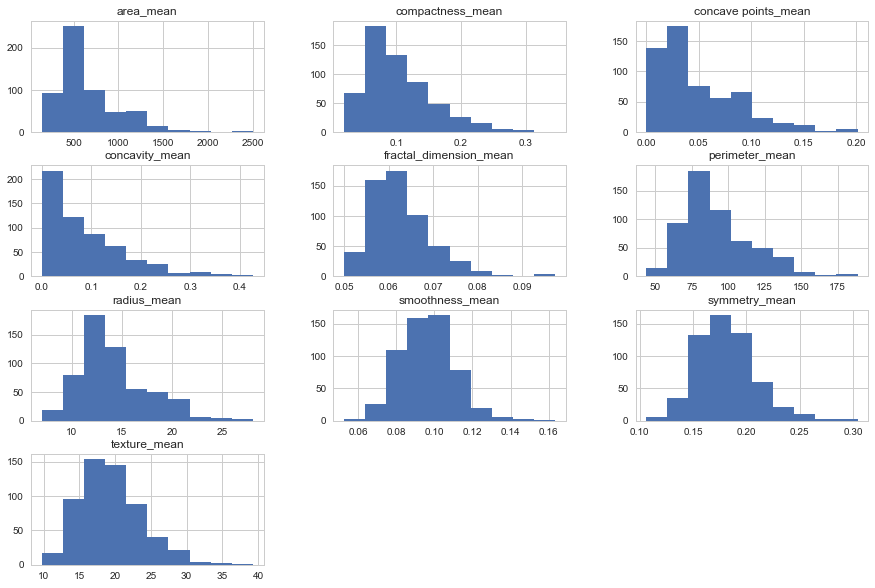

In [84]:
data_mean=data.iloc[:,1:11]
data_mean.hist(bins=10,figsize=(15,10));


### Histogram the "_se" suffix features

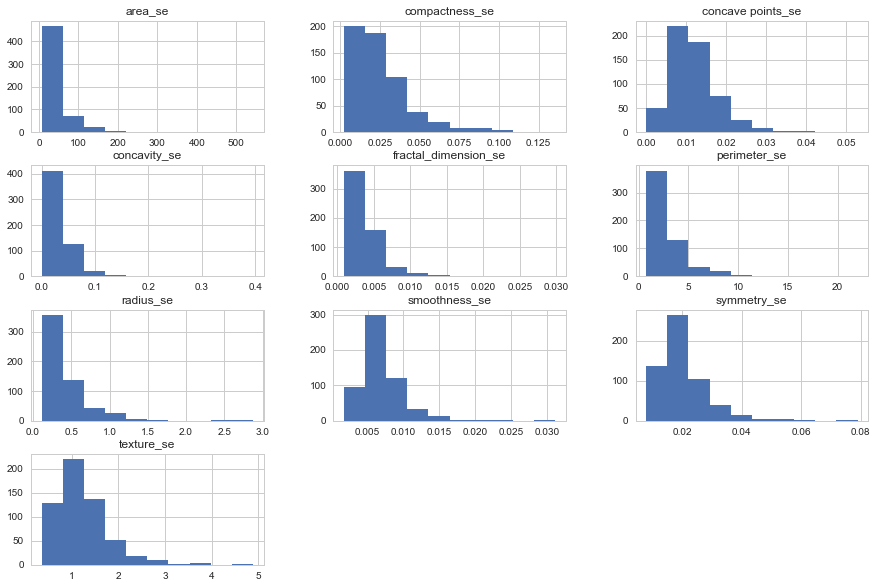

In [85]:
data_se=data.iloc[:,11:21]
data_se.hist(bins=10,figsize=(15,10));

### Histogram the "_worst" suffix features

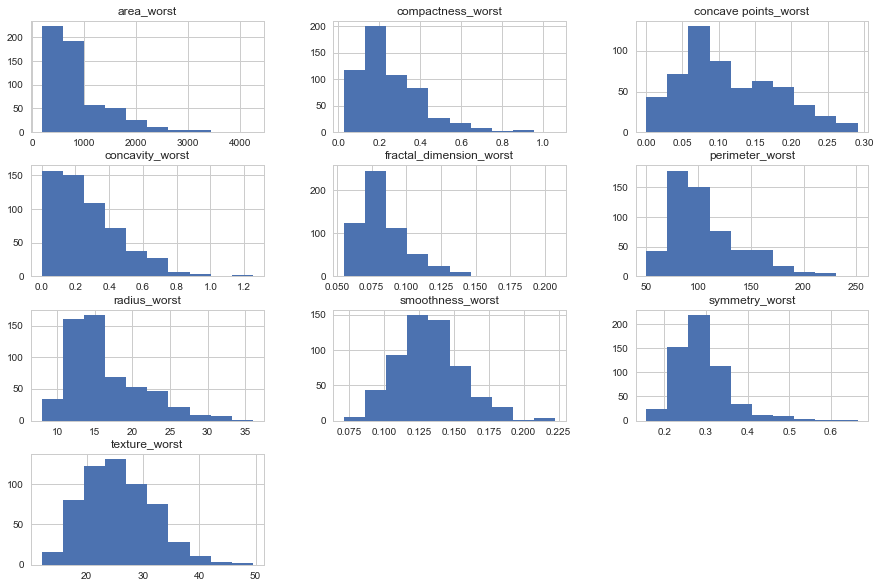

In [86]:
data_worst=data.iloc[:,21:]
data_worst.hist(bins=10,figsize=(15,10));

 ### Visualise distribution of data via Density plots

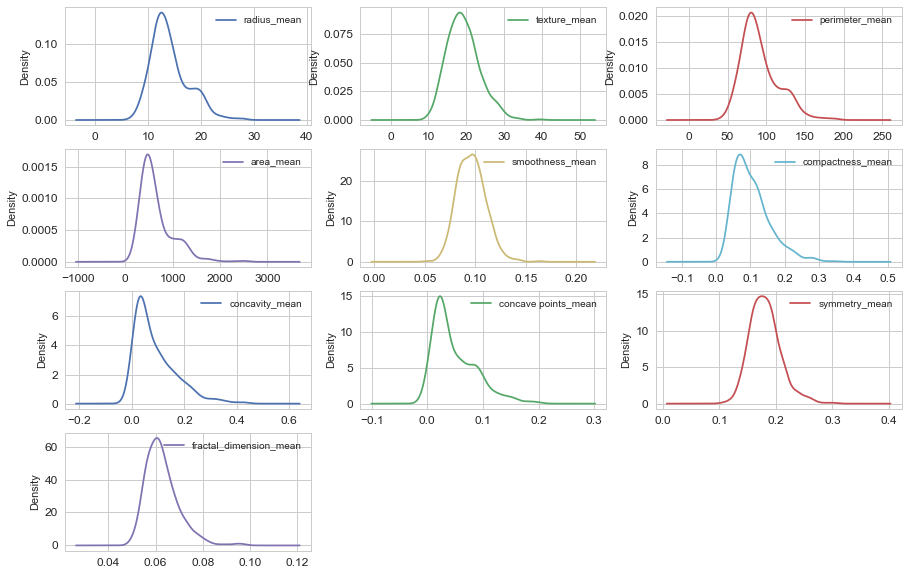

In [87]:
data_mean.plot(kind='kde',subplots=True,figsize=(15,10),layout=(4,3),sharex=False,sharey=False,fontsize=12);

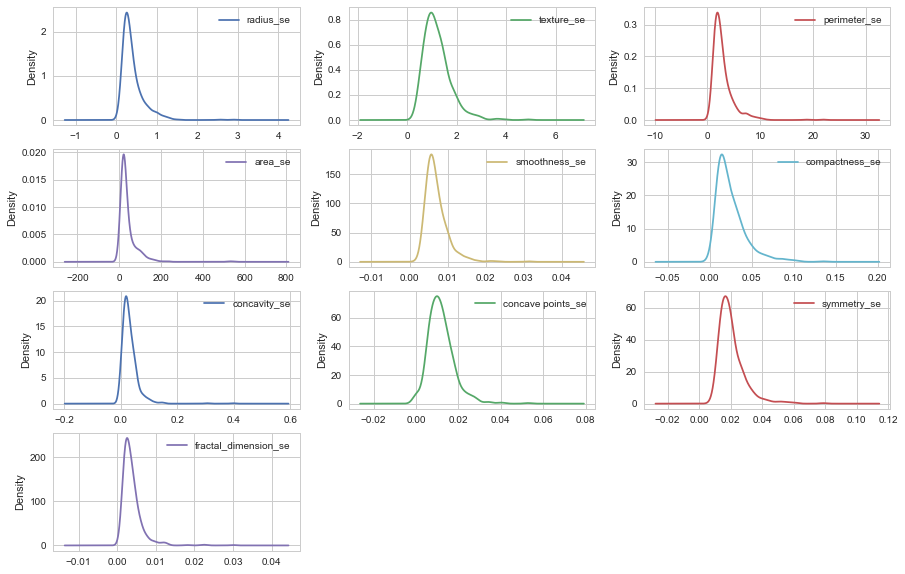

In [88]:
data_se.plot(kind='kde',subplots=True,figsize=(15,10),layout=(4,3),sharex=False,sharey=False);

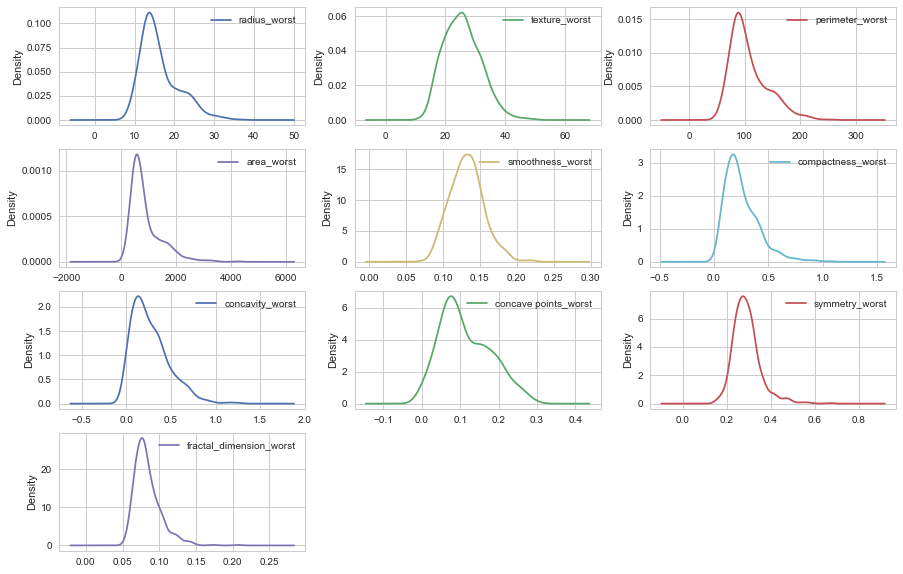

In [89]:
data_worst.plot(kind='kde',figsize=(15,10),layout=(4,3),sharex=False,sharey=False,subplots=True);

**Observation**

We can see that perhaps the attributes **perimeter**, **radius**, **area**, **concavity**, **compactness** may have an exponential distribution ( ). We can also see that perhaps the **texture**, **smooth**, **symmetry** attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## Visualize distribution of data via Box plots

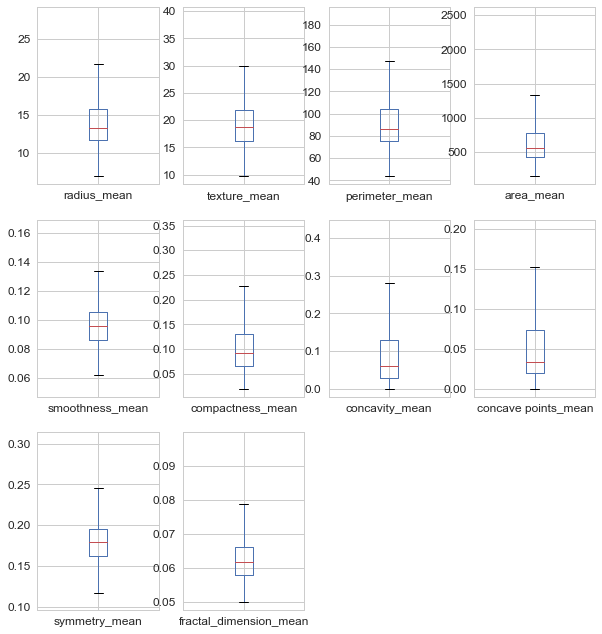

In [90]:
data_mean.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(10,15),fontsize=12);

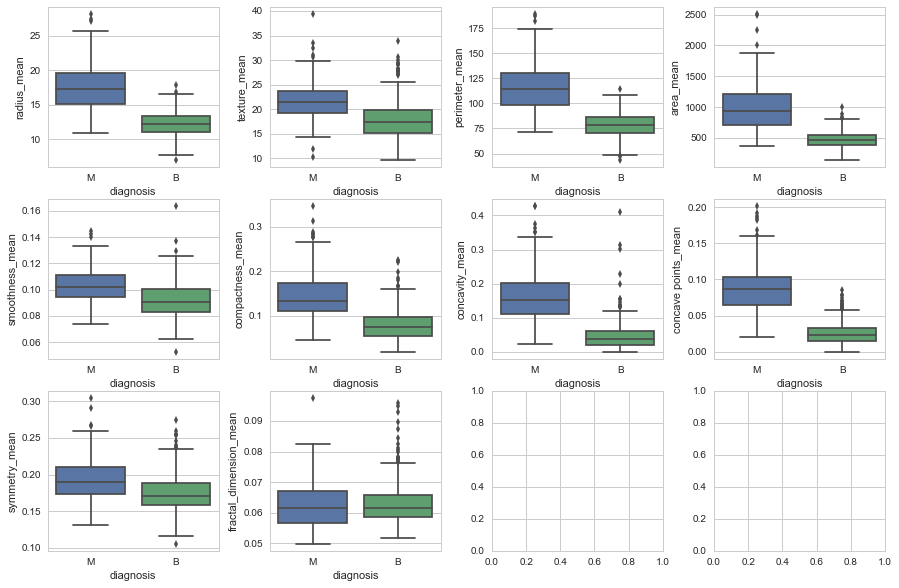

In [91]:
fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(15,10))
fig.subplots_adjust(hspace=0.2,wspace=0.3)
axes=axes.ravel()
for i,col in enumerate (data_mean):
    sns.boxplot(x='diagnosis',y=col,data=data,ax=axes[i])
    

### Box plots of the "_se" suffix features

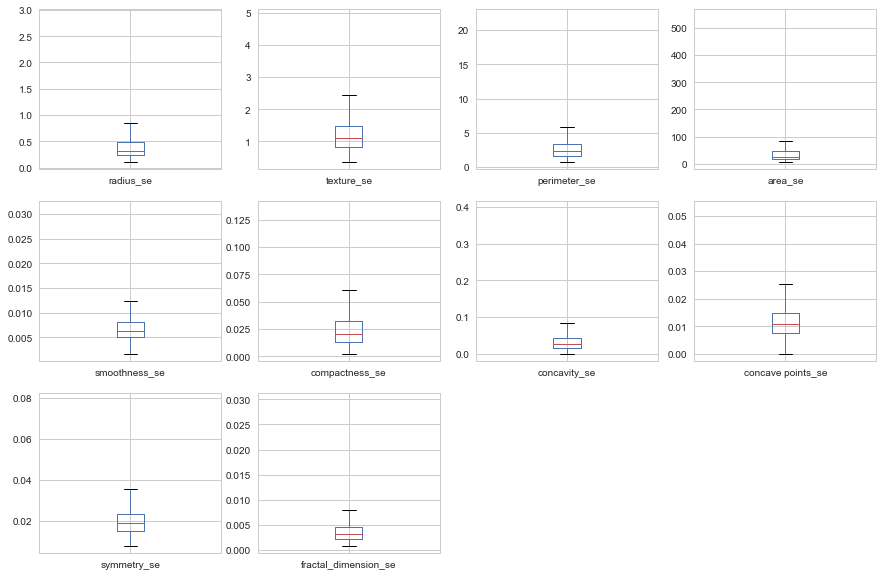

In [92]:
data_se.plot(kind='box',figsize=(15,10),subplots=True,sharex=False,sharey=False,layout=(3,4));

### Box plots of the "_worst" suffix features

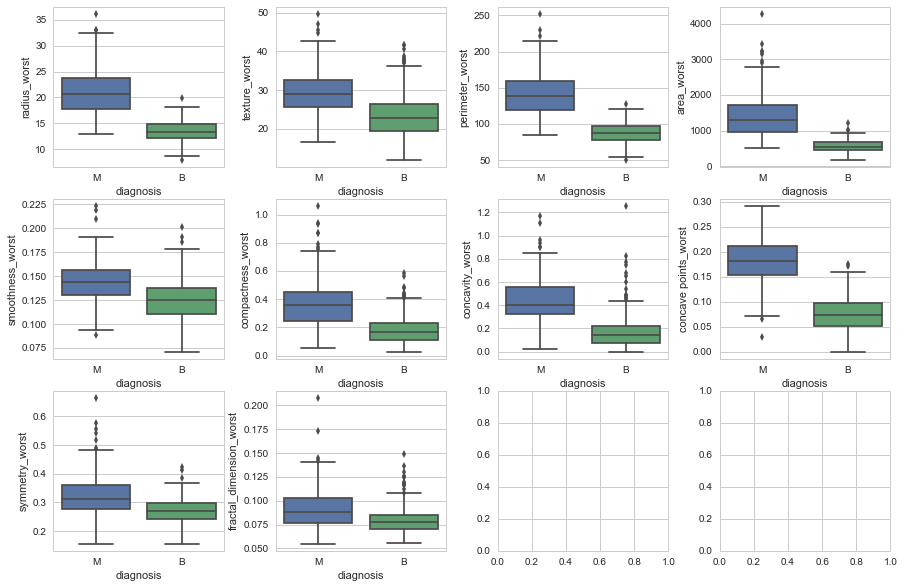

In [93]:
fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(15,10))
fig.subplots_adjust(hspace=0.2,wspace=0.3)
axes=axes.ravel()

for i,col in enumerate(data_worst):
    sns.boxplot(x='diagnosis',y=col,data=data,ax=axes[i])

**Observation**

We can see that perhaps the attributes **perimeter**, **radius**, **area**, **concavity**, **compactness** may have an exponential distribution. We can also see that perhaps the **texture**, **smooth** and **symmetry** attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

##  Multimodal Data Visualizations
* Correlation Matrix
* Scatter Plots

### Correlation Matrix

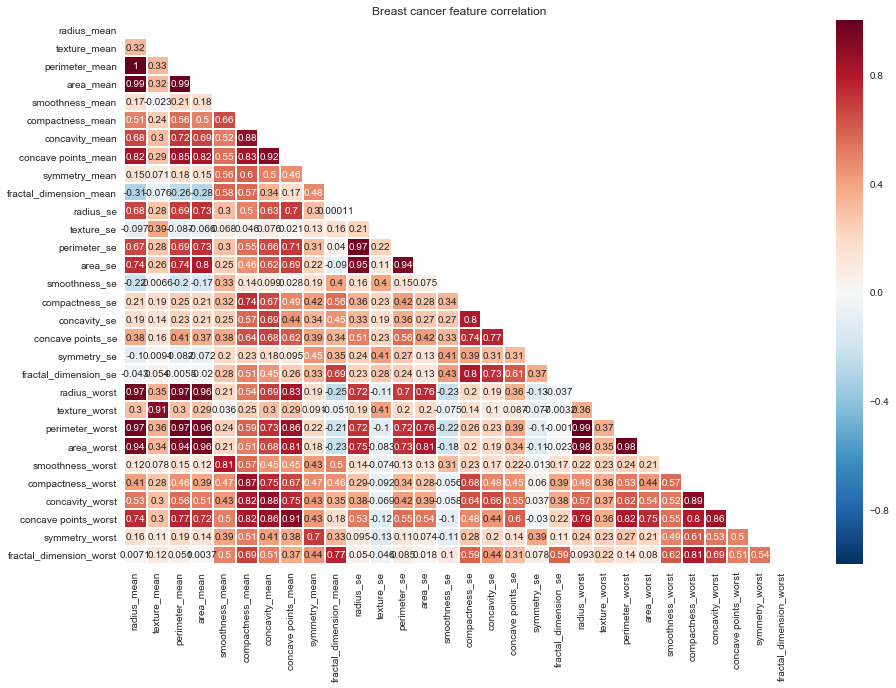

In [94]:
corr_mat=data.corr()
mask=np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15,10))
plt.title('Breast cancer feature correlation')
sns.heatmap(corr_mat,annot=True,cbar=True,mask=mask,lw=1,cmap='RdBu_r',fmt='.2g')

**Observation:**

We can see strong positive relationship exists with mean values paramaters between 1 - 0.75.
* The mean area of the tissue nucleus has a strong positive correlation with mean values of radius and parameter.
* Some paramters are moderately positive correlated (r between 0.5-0.75) are concavity and area, concavity and perimeter etc.
* Likewise, we see some strong negative correlation between fractal_dimension with radius, texture, perimeter mean values.

### Scatter Plots

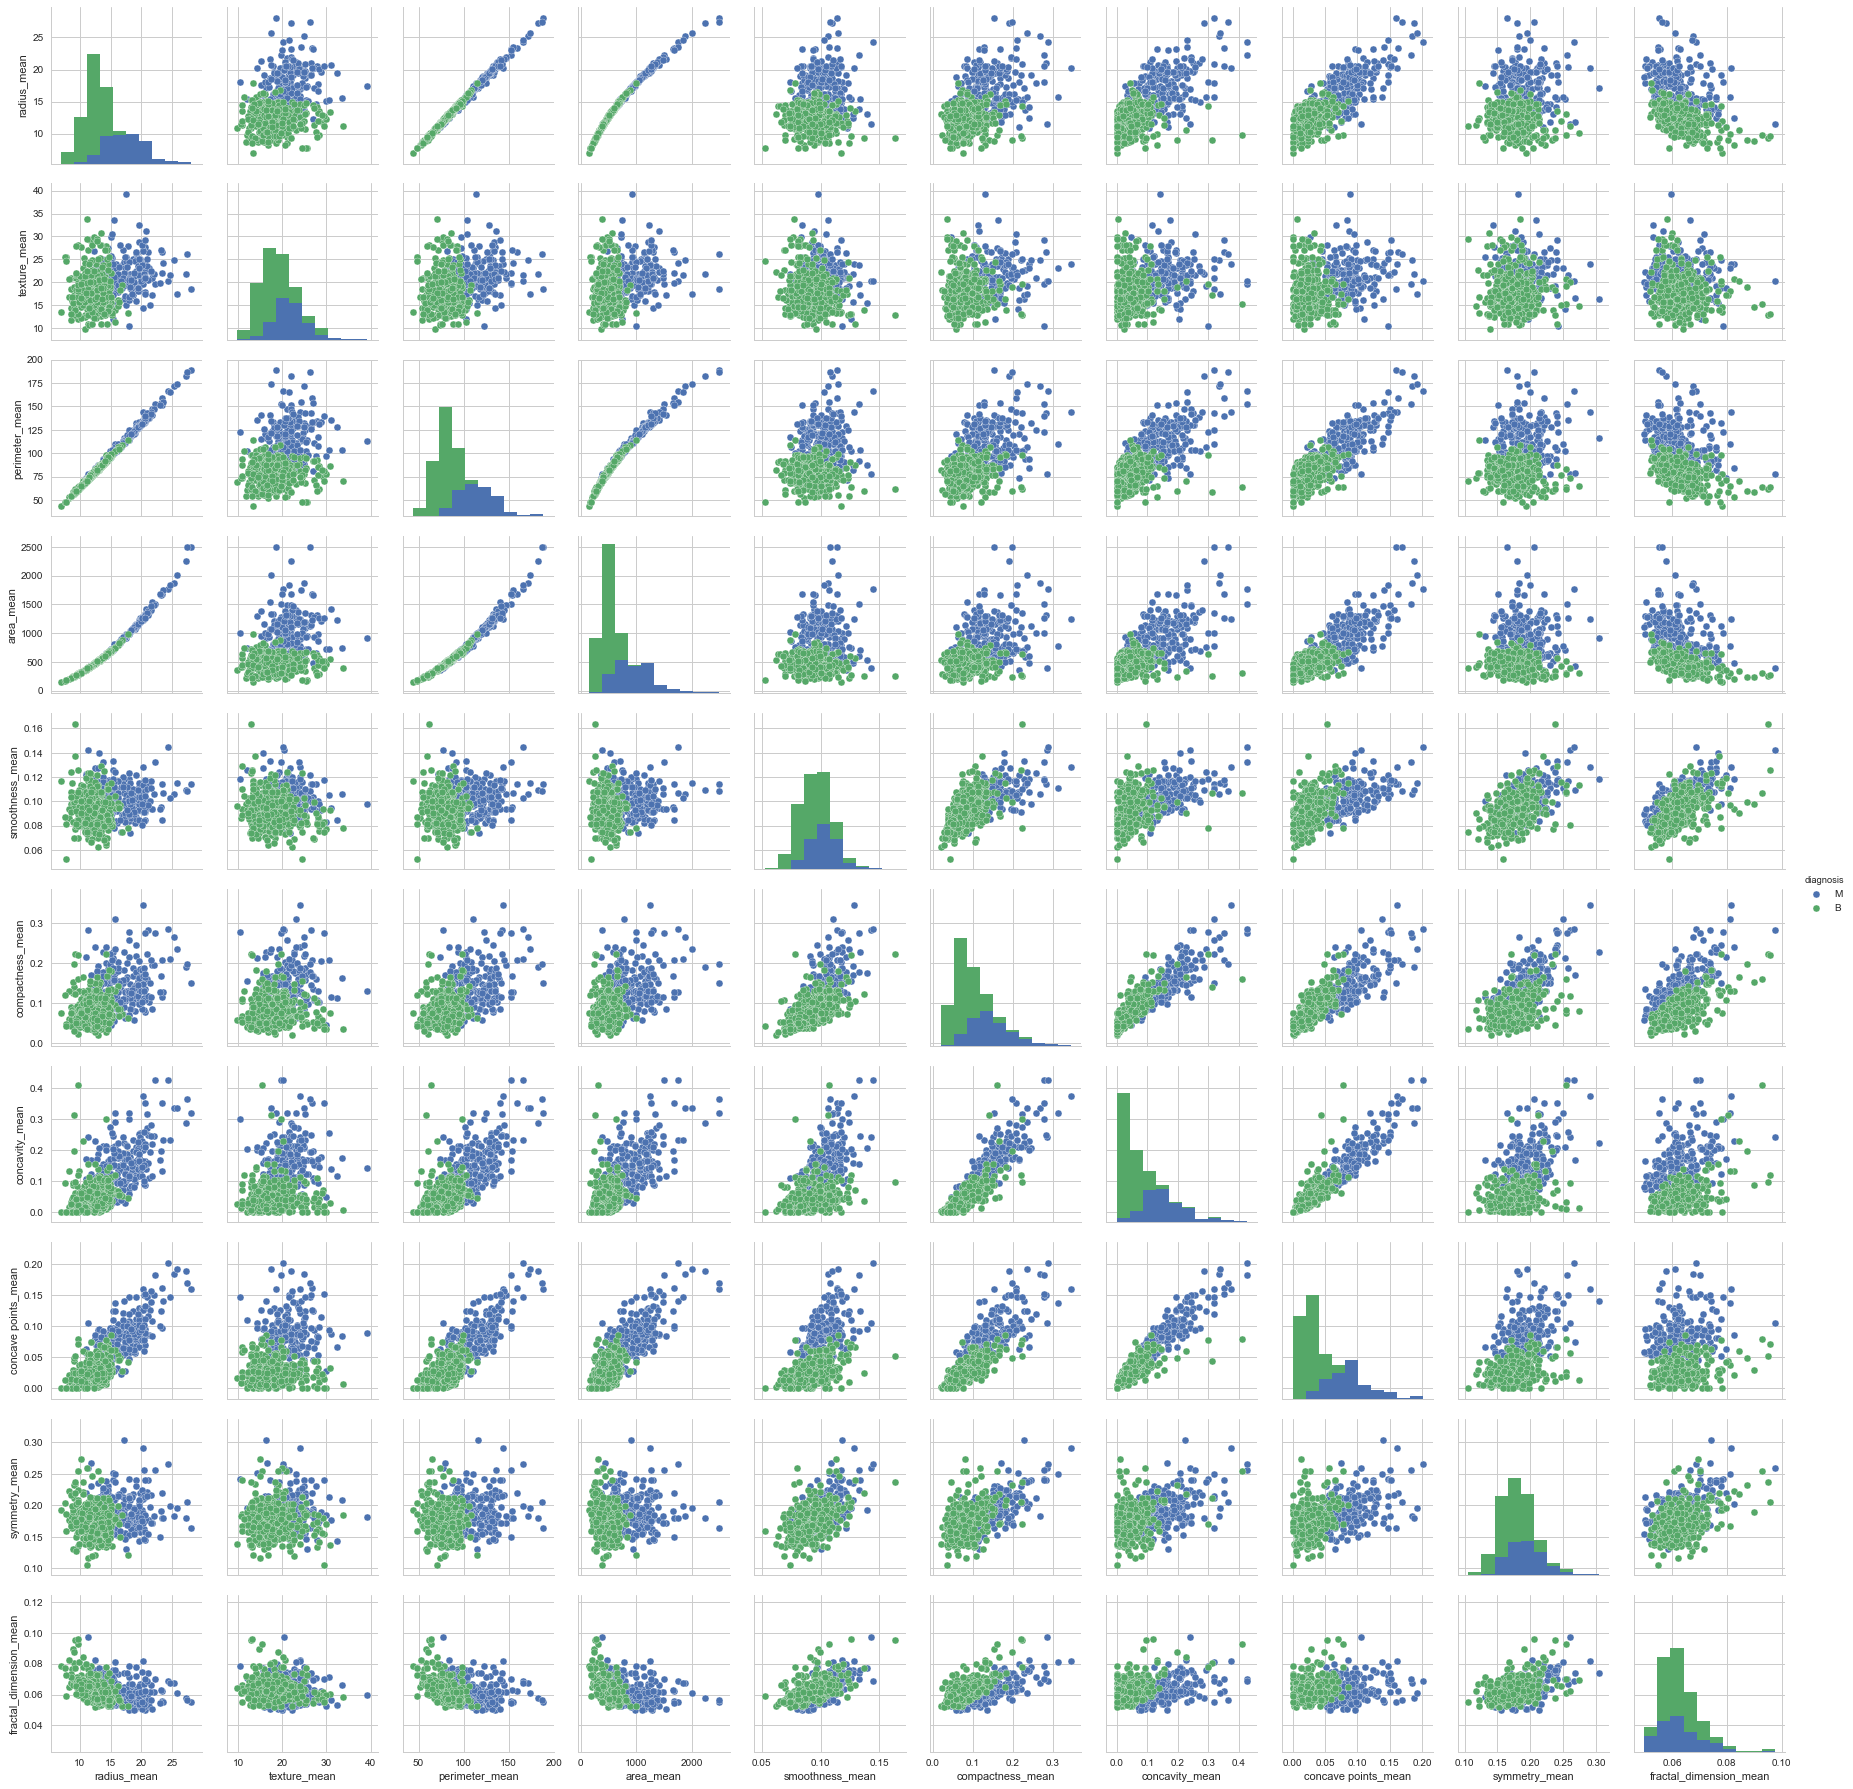

In [95]:
sns.pairplot(data[list(data_mean.columns)+['diagnosis']],hue='diagnosis');

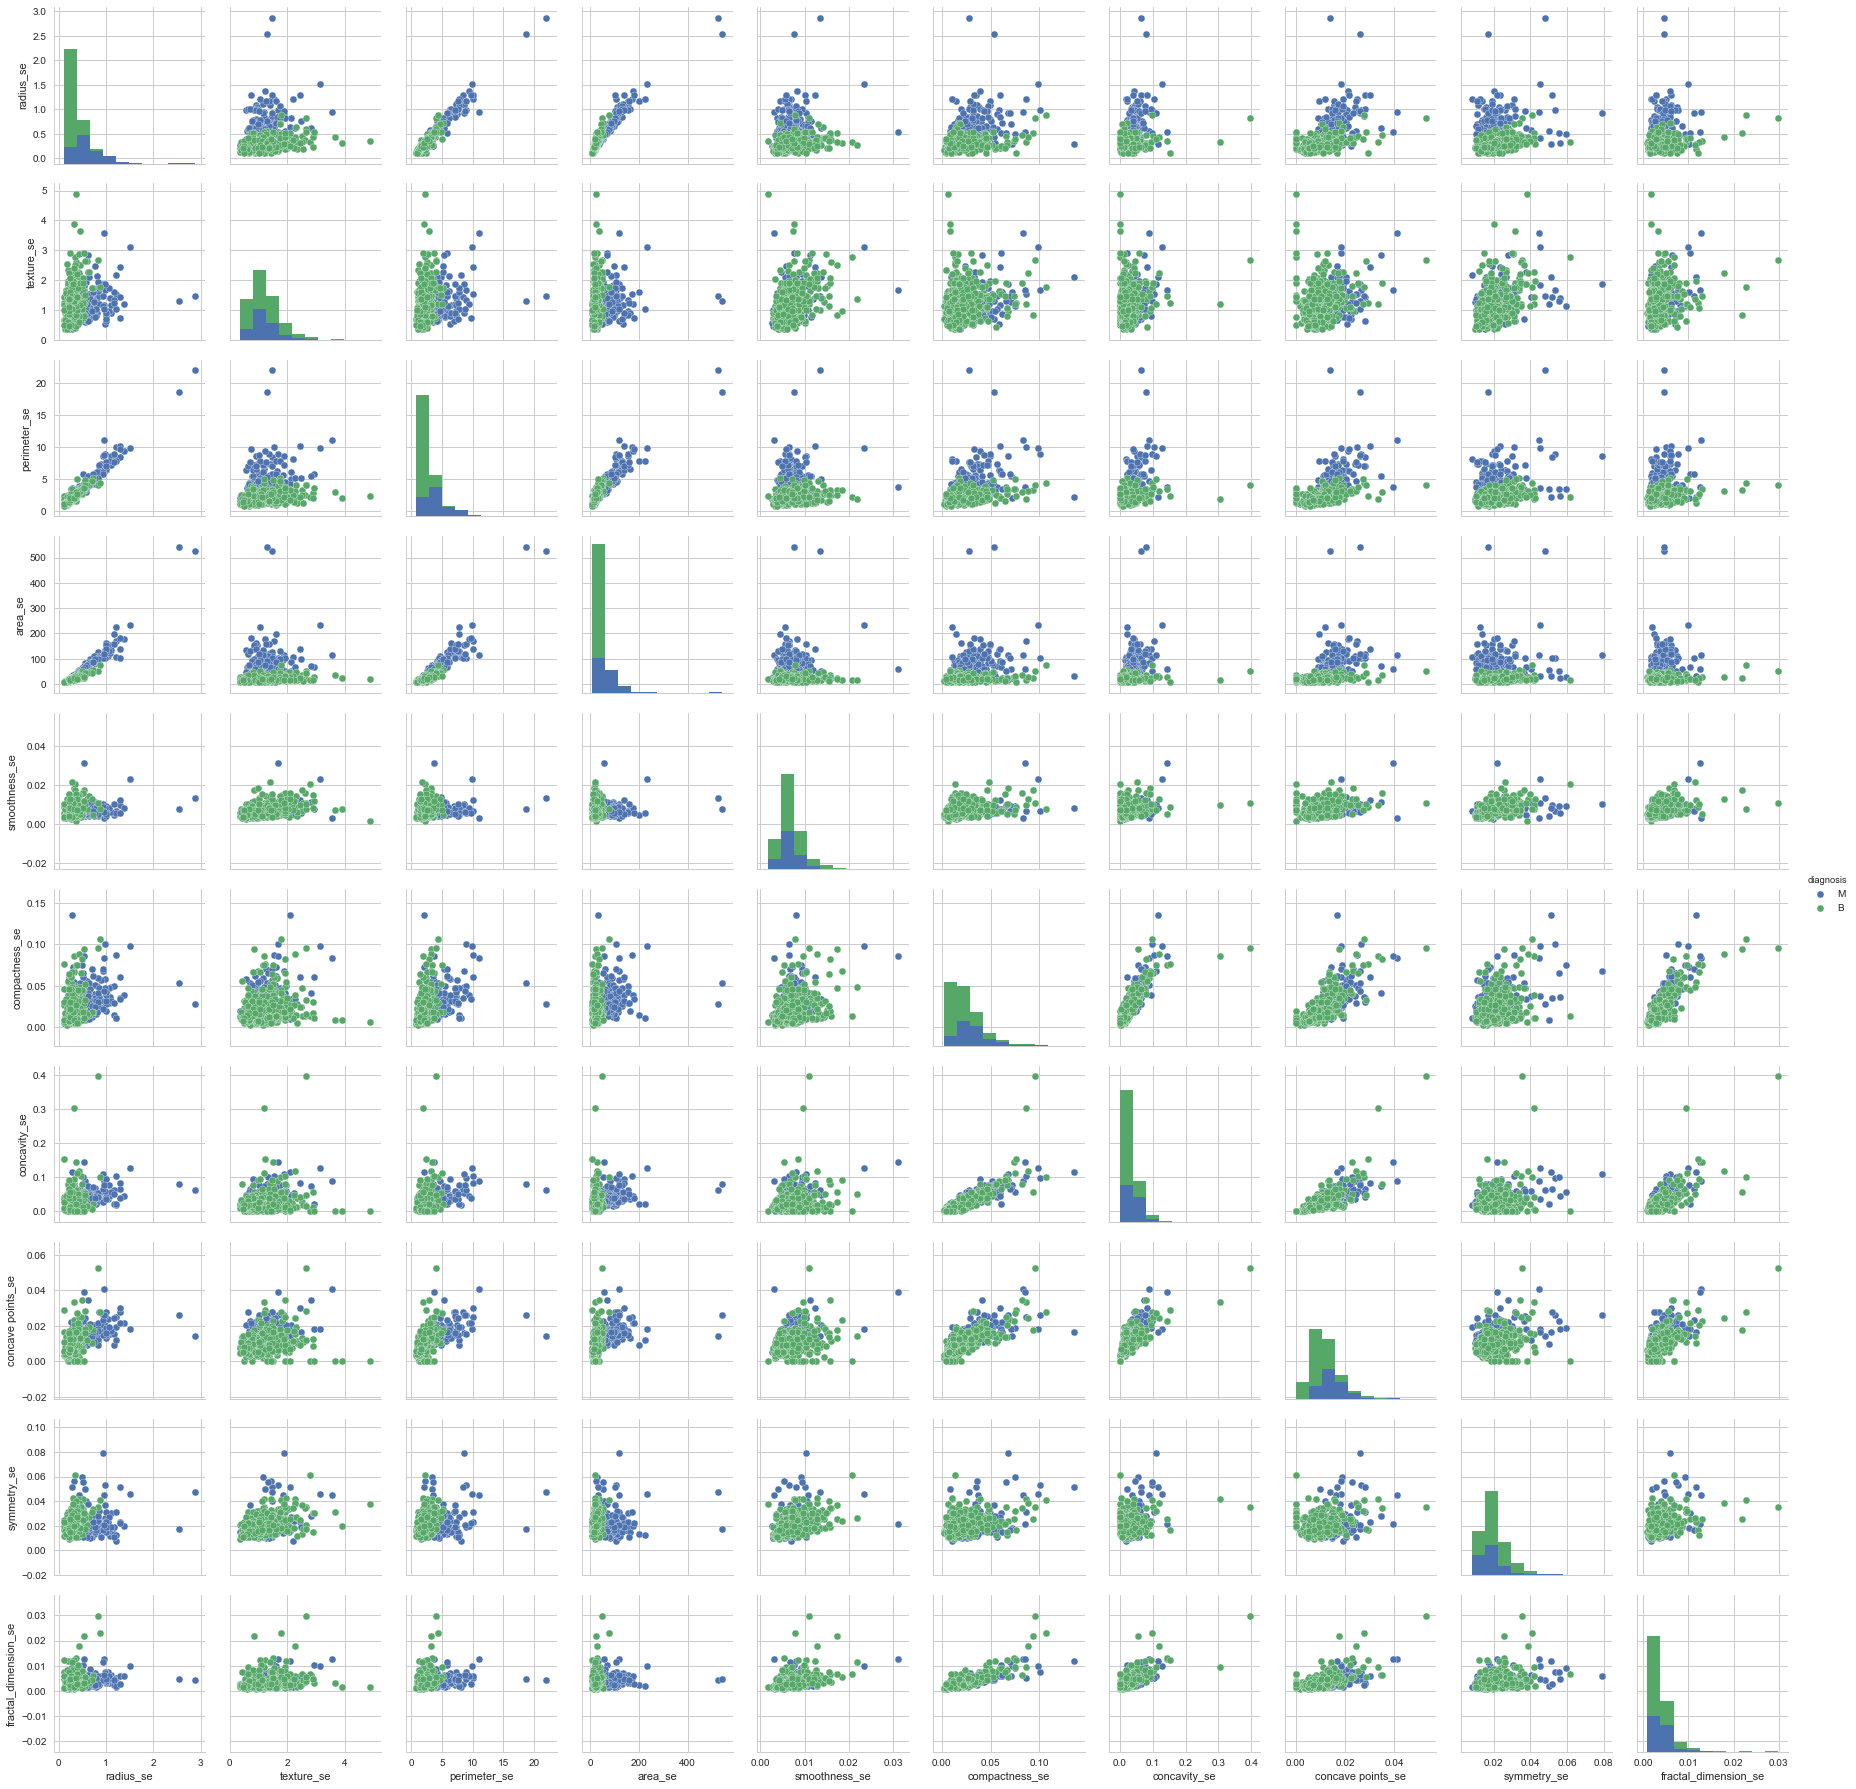

In [96]:
sns.pairplot(data[list(data_se.columns)+['diagnosis']],hue='diagnosis');

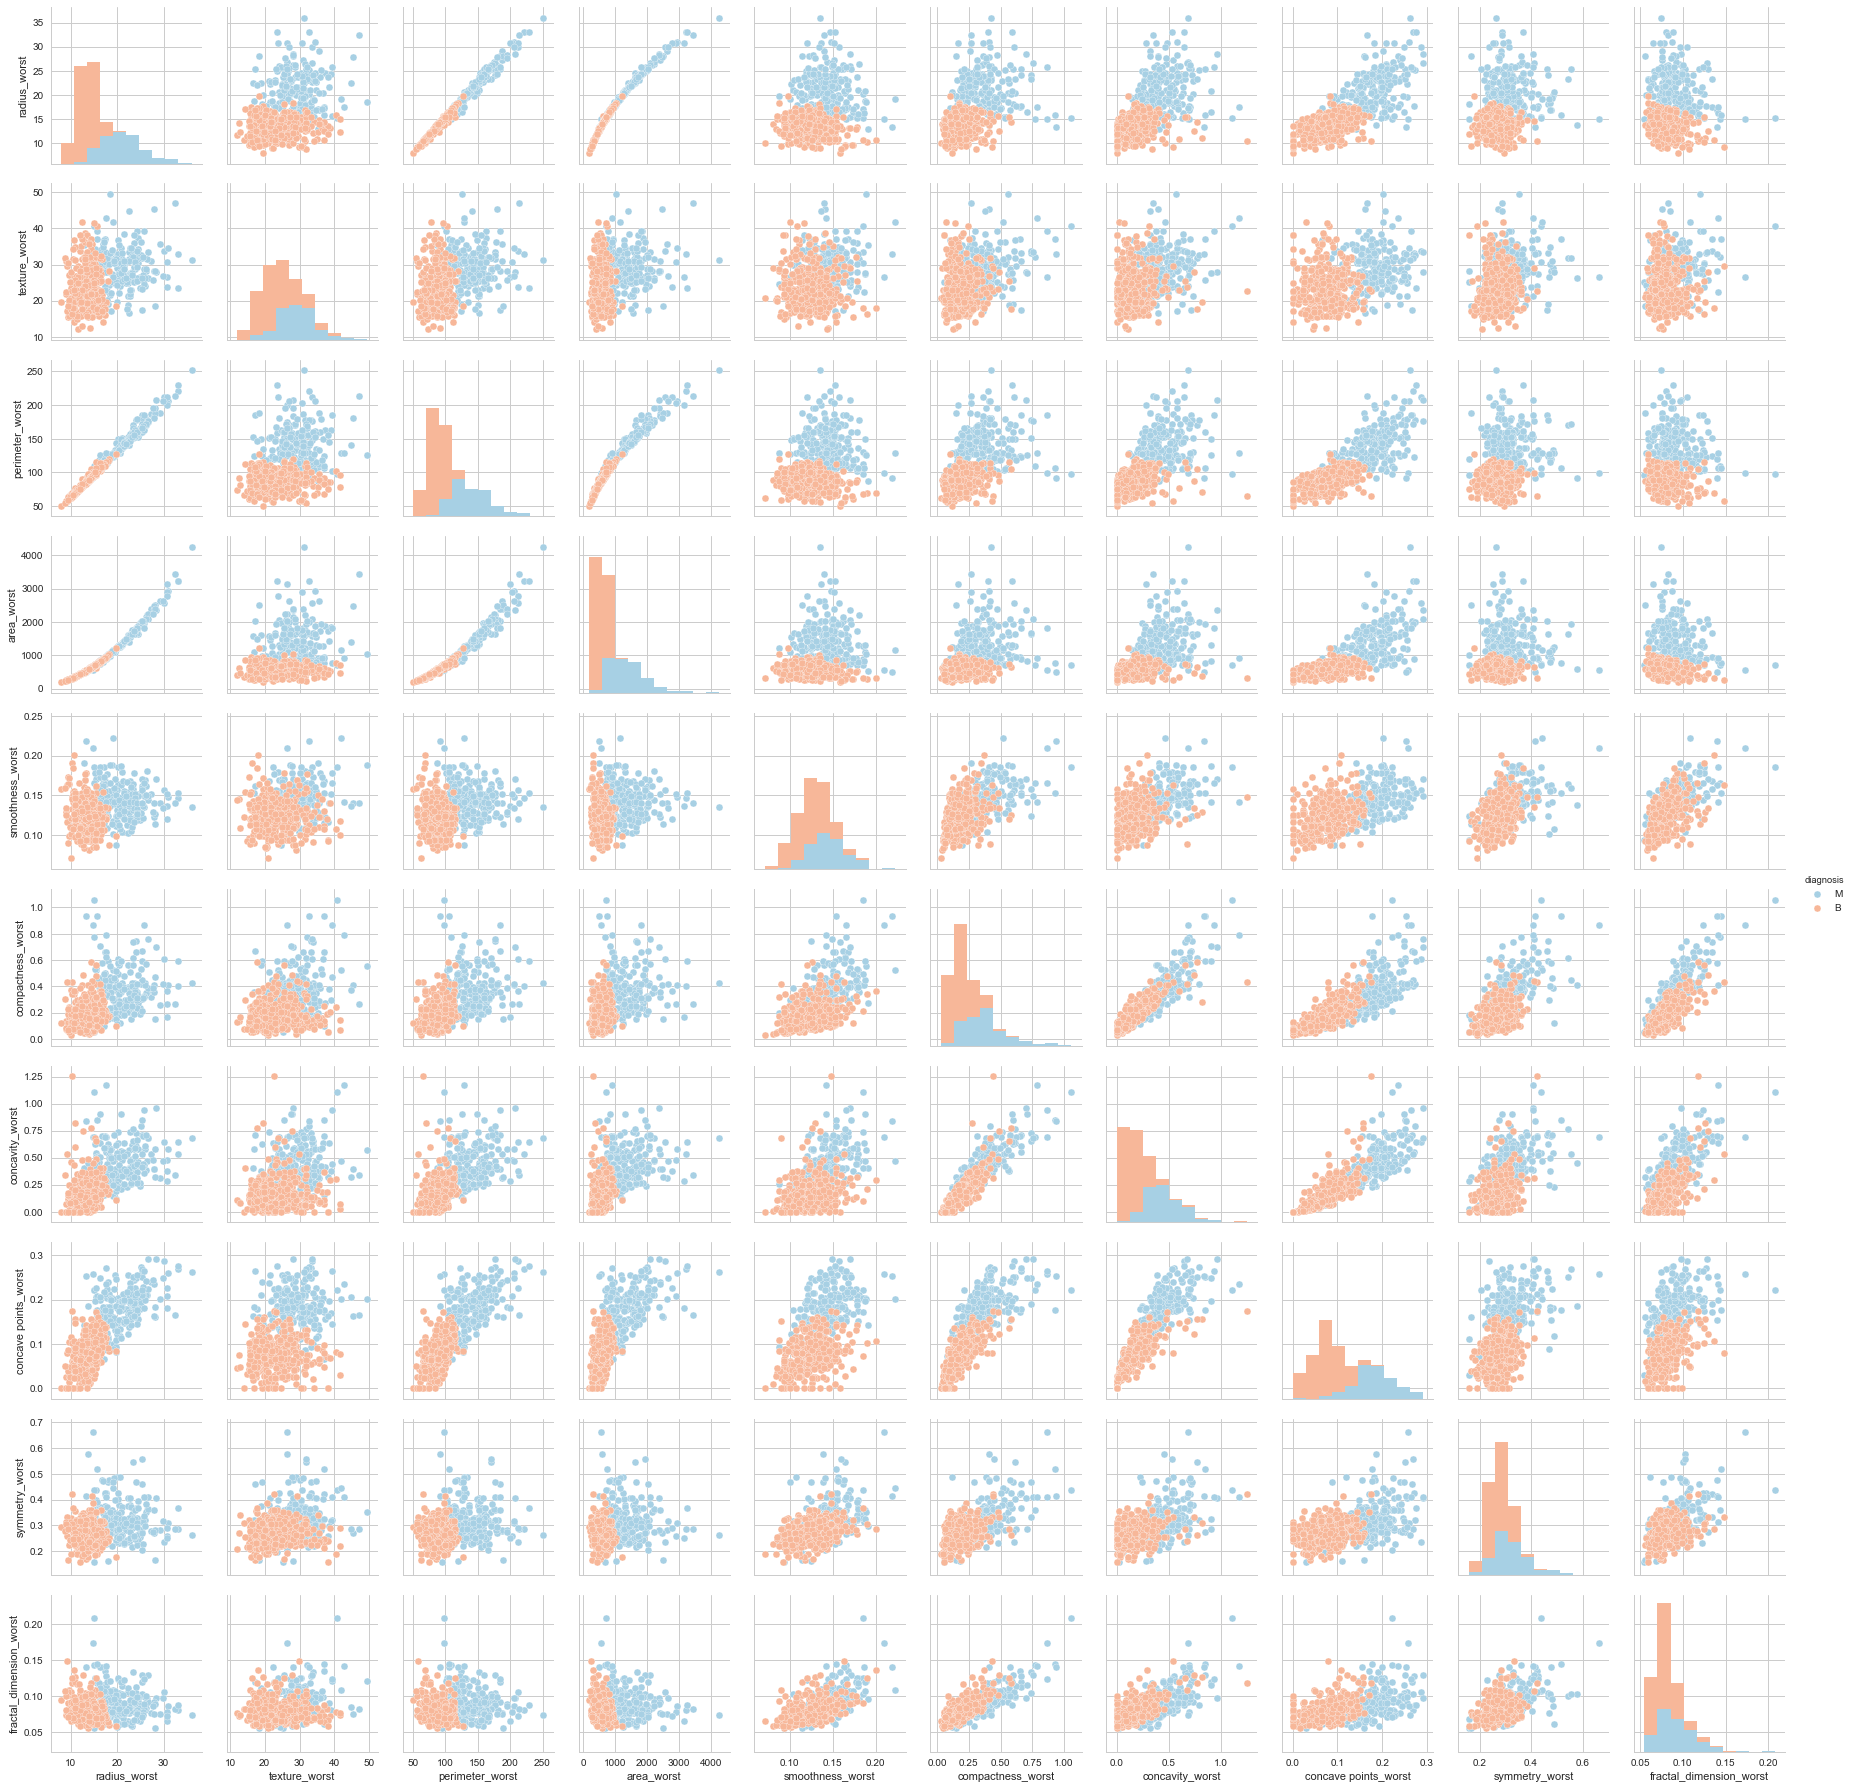

In [97]:
sns.pairplot(data[list(data_worst.columns)+['diagnosis']],hue='diagnosis',palette='RdBu_r')

**Summary**

* Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
* Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.
* In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## 3. Pre-Processing the data

Data preprocessing is a crucial step for any data analysis problem.  It is often a very good idea to prepare our data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
* Assigning numerical values to categorical data;
* Handling missing values; and
* Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

In the previous section we explored the data, to help gain insight on the distribution of the data as well as how the attributes correlate to each other. We identified some features of interest. Now, we will use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction.

### Handling Categorical Attributes : Label encoding
Here, we transform the class labels from their original string representation (M and B) into integers

In [98]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
diagnosis_encoded=encoder.fit_transform(data['diagnosis'])

In [99]:
encoder.classes_

array(['B', 'M'], dtype=object)

### Feature Standardization

* Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1. 

* As seen in previous exploratory section that the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

Let's evaluate the same algorithms with a standardized copy of the dataset. Here, we use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [101]:
X_std=scaler.fit_transform(X)

### Feature decomposition using Principal Component Analysis( PCA)

From the pair plots in exploratory analysis section above, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and retain as much information as possible when working with only 2 dimensions. We will use PCA.

Remember, PCA can be applied only on numerical data. Therefore, if the data has categorical variables they must be converted to numerical. Also, make sure we have done the basic data cleaning prior to implementing this technique. The directions of the components are identified in an unsupervised way i.e. the response variable(Y) is not used to determine the component direction. Therefore, it is an unsupervised approach and hence response variable must be removed.

Note that the PCA directions are highly sensitive to data scaling, and most likely we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features. Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance. In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.

In [102]:
feature_names=list(X.columns)

In [103]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X_std_pca=pca.fit_transform(X_std)

In [104]:
pca_df=pd.DataFrame()
pca_df['pca1']=X_std_pca[:,0]
pca_df['pca2']=X_std_pca[:,1]
pca_df.sample(5)

pca1      pca2
273 -3.639136  1.589587
210  4.808969 -3.029103
305 -3.074436 -0.306058
293 -2.870588 -0.268645
138  3.782026  0.860382

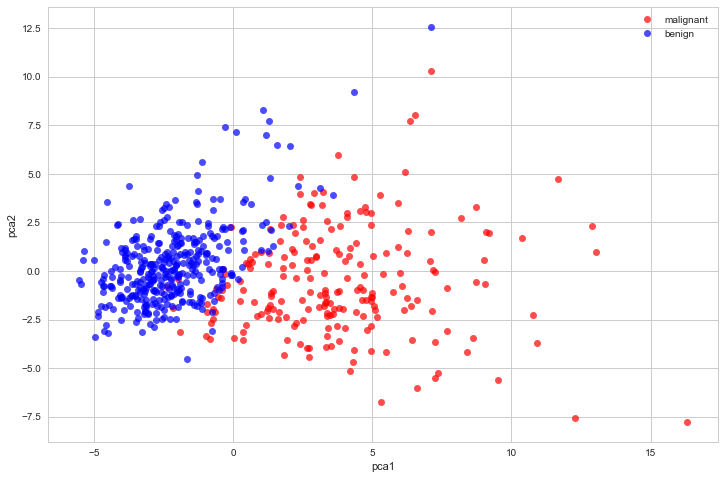

In [105]:
plt.figure(figsize=(12,8))
plt.plot(pca_df['pca1'][data['diagnosis']=='M'],pca_df['pca2'][data['diagnosis']=='M'],'ro',markeredgecolor='k',alpha=0.7)
plt.plot(pca_df['pca1'][data['diagnosis']=='B'],pca_df['pca2'][data['diagnosis']=='B'],'bo',markeredgecolor='k',alpha=0.7)

plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(['malignant','benign'])

Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are "most spread" along the new feature axes.

#### Deciding How Many Principal Components to Retain

In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a **scree plot**. 

In [106]:
# PCA explained variance - The amount of variance that each PC explains
var_expl=pca.explained_variance_ratio_
var_expl

array([ 0.44272026,  0.18971182,  0.09393163,  0.06602135,  0.05495768,
        0.04024522,  0.02250734,  0.01588724,  0.01389649,  0.01168978])

In [107]:
#cumulative variance
cum_var=np.cumsum(var_expl)
cum_var

array([ 0.44272026,  0.63243208,  0.72636371,  0.79238506,  0.84734274,
        0.88758796,  0.9100953 ,  0.92598254,  0.93987903,  0.95156881])

In [108]:
var_expl_ratio=pca.explained_variance_ratio_.reshape(len(pca.components_),1)

var_expl_ratio_df=pd.DataFrame(np.round(var_expl_ratio,4),columns=['Explained_varaince'])
var_expl_ratio_df['cumulative explained variance']=np.cumsum(var_expl_ratio)
dimensions=['PCA_component_{}'.format(i) for i in range(1,len(pca.components_)+1)]
var_expl_ratio_df.index=dimensions
var_expl_ratio_df

Explained_varaince  cumulative explained variance
PCA_component_1               0.4427             0.442720          
PCA_component_2               0.1897             0.632432          
PCA_component_3               0.0939             0.726364          
PCA_component_4               0.0660             0.792385          
PCA_component_5               0.0550             0.847343          
PCA_component_6               0.0402             0.887588          
PCA_component_7               0.0225             0.910095          
PCA_component_8               0.0159             0.925983          
PCA_component_9               0.0139             0.939879          
PCA_component_10              0.0117             0.951569

**Scree Plot**

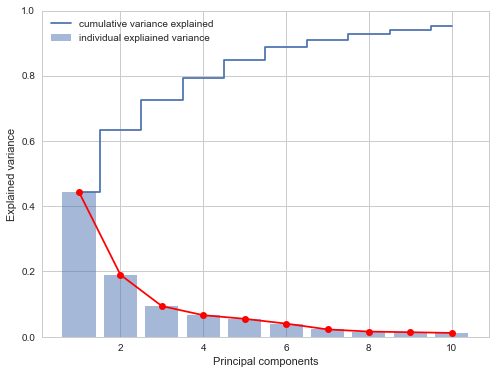

In [109]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca.components_)+1),var_expl,alpha=0.5,align='center',label='individual expliained variance')
plt.step(range(1,len(pca.components_)+1),cum_var,where='mid',label='cumulative variance explained')
plt.plot(range(1,len(pca.components_)+1),var_expl,'ro-',)

plt.xlabel('Principal components')
plt.ylabel('Explained variance')
plt.legend()

**Observation**

The most obvious change in slope in the scree plot occurs at component 2, which is the `"elbow"` of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

#### Principal Components Feature Weights as function of the components: Bar Plot

In [110]:
# PCA components
components_df=pd.DataFrame(np.round(pca.components_,4),columns=feature_names)
dimensions=['PCA_{}'.format(i) for i in range (1,len(pca.components_)+1)]
components_df.index=dimensions

components_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PCA_1        0.2189        0.1037          0.2275     0.2210           0.1426   
PCA_2       -0.2339       -0.0597         -0.2152    -0.2311           0.1861   
PCA_3       -0.0085        0.0645         -0.0093     0.0287          -0.1043   
PCA_4        0.0414       -0.6031          0.0420     0.0534           0.1594   
PCA_5        0.0378       -0.0495          0.0374     0.0103          -0.3651   
PCA_6        0.0187       -0.0322          0.0173    -0.0019          -0.2864   
PCA_7       -0.1241        0.0114         -0.1145    -0.0517          -0.1407   
PCA_8       -0.0075        0.1307         -0.0187     0.0347          -0.2890   
PCA_9       -0.2231        0.1127         -0.2237    -0.1956           0.0064   
PCA_10       0.0955        0.2409          0.0864     0.0750          -0.0693   

        compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PCA_1             0.2393          0.2584               0.2609         0.1382   
PCA_2             0.1519          0.0602              -0.0348         0.1903   
PCA_3            -0.0741          0.0027              -0.0256        -0.0402   
PCA_4             0.0318          0.0191               0.0653         0.0671   
PCA_5             0.0117          0.0864              -0.0439        -0.3059   
PCA_6            -0.0141         -0.0093              -0.0520         0.3565   
PCA_7             0.0309         -0.1075              -0.1505        -0.0939   
PCA_8            -0.1514         -0.0728              -0.1523        -0.2315   
PCA_9            -0.1678          0.0406              -0.1120         0.2560   
PCA_10            0.0129         -0.1356               0.0081         0.5721   

        fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
PCA_1                0.0644        0.2060      0.0174        0.2113   0.2029   
PCA_2                0.3666       -0.1056      0.0900       -0.0895  -0.1523   
PCA_3               -0.0226        0.2685      0.3746        0.2666   0.2160   
PCA_4                0.0486        0.0979     -0.3599        0.0890   0.1082   
PCA_5               -0.0444       -0.1545     -0.1917       -0.1210  -0.1276   
PCA_6               -0.1194       -0.0256     -0.0287        0.0018  -0.0429   
PCA_7                0.2958        0.3125     -0.0908        0.3146   0.3467   
PCA_8               -0.1771        0.0225     -0.4754       -0.0119   0.0858   
PCA_9               -0.1237        0.2500     -0.2466        0.2272   0.2292   
PCA_10               0.0811       -0.0495     -0.2891       -0.1145  -0.0919   

        smoothness_se  compactness_se  concavity_se  concave points_se  \
PCA_1          0.0145          0.1704        0.1536             0.1834   
PCA_2          0.2044          0.2327        0.1972             0.1303   
PCA_3          0.3088          0.1548        0.1765             0.2247   
PCA_4          0.0447         -0.0275        0.0013             0.0741   
PCA_5         -0.2321          0.2800        0.3540             0.1955   
PCA_6         -0.3429          0.0692        0.0563            -0.0312   
PCA_7         -0.2440          0.0235       -0.2088            -0.3696   
PCA_8          0.5734          0.1175        0.0606            -0.1083   
PCA_9         -0.1419         -0.1453        0.3581             0.2725   
PCA_10         0.1609          0.0435       -0.1413             0.0862   

        symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
PCA_1        0.0425               0.1026         0.2280         0.1045   
PCA_2        0.1838               0.2801        -0.2199        -0.0455   
PCA_3        0.2886               0.2115        -0.0475        -0.0423   
PCA_4        0.0441               0.0153         0.0154        -0.6328   
PCA_5       -0.2529               0.2633        -0.0044        -0.0929   
PCA_6        0.4902              -0.0532        -0.0003        -0.0500   
PCA_7       -0.0804  

#### Principal Components Important Points

- We should not combine the train and test set to obtain PCA components of whole data at once. Because, this would violate the entire assumption of generalization since test data would get 'leaked' into the training set. In other words, the test data set would no longer remain 'unseen'. Eventually, this will hammer down the generalization capability of the model.

- We should not perform PCA on test and train data sets separately. Because, the resultant vectors from train and test PCAs will have different directions ( due to unequal variance). Due to this, we’ll end up comparing data registered on different axes. Therefore, the resulting vectors from train and test data should have same axes.

- We should do exactly the same transformation to the test set as we did to training set, including the center and scaling feature.

### 3.5 Feature decomposition using t-SNE

t-Distributed Stochastic Neighbor Embedding ([t-SNE](http://lvdmaaten.github.io/tsne/)) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one. The original paper describes the working of t-SNE as:

*t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.*

Essentially what this means is that it looks at the original data that is entered into the algorithm and looks at how to best represent this data using less dimensions by matching both distributions. The way it does this is computationally quite heavy and therefore there are some (serious) limitations to the use of this technique. For example one of the recommendations is that, in case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE:

*It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.*

The other key drawback is that since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large).

In [111]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=random_state)
X_std_tsne=tsne.fit_transform(X_std)


[]

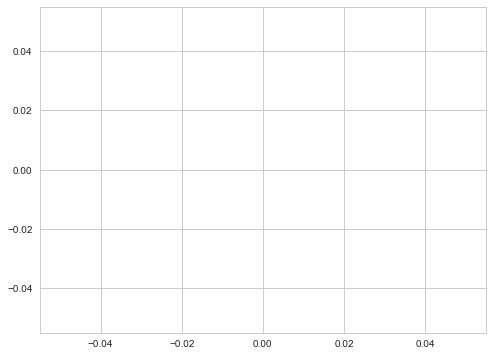

In [112]:
plt.figure(figsize=(8,6))
plt.plot()

In [113]:
X_std_tsne

array([[ 36.02442551, -18.749506  ],
       [ 26.37699127,  -9.90633488],
       [ 31.44695473, -15.34799004],
       ..., 
       [ 14.28367996, -11.31510067],
       [ 38.70786285, -17.72727966],
       [-22.78738594,  16.89635849]], dtype=float32)

In [114]:
tsne_df=pd.DataFrame()
tsne_df['tsne_1']=X_std_tsne[:,0]
tsne_df['tsne_2']=X_std_tsne[:,1]
tsne_df.head()

tsne_1     tsne_2
0  36.024426 -18.749506
1  26.376991  -9.906335
2  31.446955 -15.347990
3  15.258775  -6.535676
4  23.437918 -17.460606

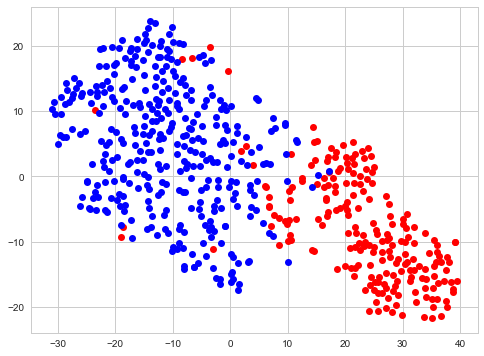

In [115]:
plt.figure(figsize=(8,6))
plt.plot(tsne_df['tsne_1'][y=='M'],tsne_df['tsne_2'][y=='M'],'ro',markeredgecolor='y')
plt.plot(tsne_df['tsne_1'][y=='B'],tsne_df['tsne_2'][y=='B'],'bo',markeredgecolor='y')

It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give us an unbiased estimated of our model's true performance. Hence, in the next section we will use cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.

## 4. Predictive model using Support Vector Machine (SVM)

Support vector machines (SVMs) learning algorithm will be used to build the predictive model.  SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

Kernelized support vector machines are powerful models and perform well on a variety of datasets. 
1. SVMs allow for complex decision boundaries, even if the data has only a few features. 
2. They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.
    **Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.**

3. SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.

4.  SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

#### Important Parameters
The important parameters in kernel SVMs are the
* Regularization parameter C; 
* The choice of the kernel - (linear, radial basis function(RBF) or polynomial);
* Kernel-specific parameters. 

gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

### Split data into training and test sets

The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. splitting the data into test and training sets is crucial to avoid overfitting. This allows generalization of real, previously-unseen data. Here we will
* split the available data into a training set and a testing set (70% training, 30% test)
* train the algorithm on the first part
* make predictions on the second part and 
* evaluate the predictions against the expected results

The size of the split can depend on the size and specifics of our dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
le=LabelEncoder()
# transform the class labels from their original string representation (M and B) into integers
data['diagnosis']=le.fit_transform(data['diagnosis'])

In [118]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419              0.07871        1.0950      0.9053         8.589   
1         0.1812              0.05667        0.5435      0.7339         3.398   
2         0.2069              0.05999        0.7456      0.7869         4.585   
3         0.2597              0.09744        0.4956      1.1560         3.445   
4         0.1809              0.05883        0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003             0.006193          25.38          17.33   
1      0.01389             0.003532          24.99          23.41   
2      0.02250             0.004571          23.57          25.53   
3      0.05963             0.009208          14.91          26.50   
4      0.01756             0.005115          22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119               0.2654           0.4601   
1           0.2416               0.1860           0.2750   
2           0.4504               0.2430           0.3613   
3           0.6869               0.2575           0.6638   
4           0.4000               0.1625           0.2364   

   fractal_dimension_worst  
0              0.11890      
1              0.08902      
2              0.08758      
3              0.17300      
4              0.07678

In [119]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(data[feature_names],data['diagnosis'],random_state=random_state,test_size=0.3)

In [120]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler=StandardScaler()
Xs_train=scaler.fit_transform(X_train)

In [121]:
from sklearn.svm import SVC
clf=SVC(C=1.0,kernel='rbf',degree=3,probability=True)
clf.fit(Xs_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [122]:
Xs_test=scaler.transform(X_test)

In [123]:
classifier_score=clf.score(Xs_test,y_test)
print('The classifier score is : {:.2f}'.format(classifier_score))

The classifier score is : 0.99


To get a better measure of prediction accuracy (which we can use as a proxy for "goodness of fit" of the model), we can successively split the data into folds that we will use for training and testing:

### Classification with cross-validation

Cross-validation extends the idea of train and test set split idea further. Instead of having a single train/test split, we specify **folds** so that the data is divided into similarly-sized folds. 

* Training occurs by taking all folds except one - referred to as the holdout sample.

* On the completion of the training, we test the performance of our fitted model using the holdout sample. 

* The holdout sample is then thrown back with the rest of the other folds, and a different fold is pulled out as the new holdout sample. 

* Training is repeated again with the remaining folds and we measure performance using the holdout sample. This process is repeated until each fold has had a chance to be a test or holdout sample. 

* The expected performance of the classifier, called cross-validation error, is then simply an average of error rates computed on each holdout sample. 

This process is demonstrated by first performing a standard train/test split, and then computing cross-validation error.

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
n_folds=3
cv_clf=SVC(C=1.0,kernel='rbf',degree=3)
cv=cross_val_score(cv_clf,Xs_train,y_train,cv=n_folds,)

In [126]:
print('{} fold cross validation score for SVM classifier is :{:.2f}'.format(n_folds,np.average(cv)))

3 fold cross validation score for SVM classifier is :0.97


### Classification with Feature Selection & cross-validation

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_classif

#model with just 3 features
clf_fs_cv=Pipeline([('feature_selector',SelectKBest(f_classif,k=3)),
                    ('svc',SVC(C=1,kernel='rbf',gamma='auto',probability=True,degree=3))
    
])

scores=cross_val_score(clf_fs_cv,Xs_train,y_train,cv=3)

In [128]:
print(scores)

[ 0.91729323  0.93233083  0.96212121]


In [129]:
avg=(100*np.mean(scores),100*np.std(scores)/np.sqrt(scores.shape[0]))
print('Average scores and uncertainty is (%.2f+-%.3f)%%'%avg)

Average scores and uncertainty is (93.72+-1.076)%


From the above results, we can see that only a fraction of the features are required to build a model that performs similarly to models based on using the entire set of features.

Feature selection is an important part of the model-building process that we must always pay particular attention to. The details are beyond the scope of this notebook. In the rest of the analysis, we will continue using the entire set of features.

In [130]:
from sklearn.metrics import confusion_matrix,classification_report
clf.fit(Xs_train,y_train)
y_pred=clf.predict(Xs_test)

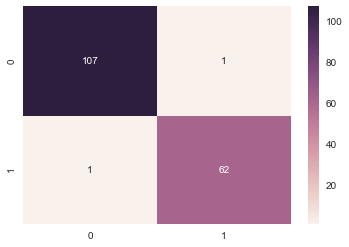

In [131]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [132]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[107   1]
 [  1  62]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       108
          1       0.98      0.98      0.98        63

avg / total       0.99      0.99      0.99       171



#### Observation 
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign
= 0 (indicates abscence).

* The classifier made a total of 171 predictions (i.e 171 patients were being tested for the presence breast cancer).
* Out of those 171 cases, the classifier predicted "yes" 63 times, and "no" 108 times.
* In reality, 63 patients in the sample have the disease, and 108 patients do not.
* 2 Observations are misclassified

#### Rates as computed from the confusion matrix
1. **Accuracy**: Overall, how often is the classifier correct?
    * (TP+TN)/total = (TP+TN)/(P+N) = (62 + 107)/171 = 0.98

2. **Misclassification Rate**: Overall, how often is it wrong?
    * (FP+FN)/total = (FP+FN)/(P+N) = (1 + 1)/171 = 0.011 equivalent to 1 minus Accuracy also known as ***"Error Rate"***

3. **True Positive Rate:** When it's actually yes, how often does it predict 1? Out of all the positive (majority class) values, how many have been predicted correctly
   * TP/actual yes = TP/(TP + FN) = 62/(62 + 1) = 0.98 also known as ***"Sensitivity"*** or ***"Recall"***

4. **False Positive Rate**: When it's actually 0, how often does it predict 1?
   * FP/actual no = FP/N = FP/(FP + TN) = 1/(1 + 107) = 0.009 equivalent to 1 minus true negative rate

5. **True Negative Rate**: When it's actually 0, how often does it predict 0? Out of all the negative (minority class) values, how many have been predicted correctly’
   * TN/actual no = TN / N = TN/(TN + FP) = 107/(107 + 1) = 0.99 also known as ***Specificity***, equivalent to 1 minus False Positive Rate

6. **Precision**: When it predicts 1, how often is it correct?
   * TP/predicted yes = TP/(TP + FP) = 62/(62 + 1) = 0.98

7. **Prevalence**: How often does the yes condition actually occur in our sample?
   * actual yes/total = 62/171 = 0.365

8. **F score**: It is the harmonic mean of precision and recall. It is used to compare several models side-by-side. Higher the better.
   * 2 x (Precision x Recall)/ (Precision + Recall)  = 2 x (0.98 x0.98 ) / (0.98 + 0.98) = 0.98 

## Optimizing the SVM Classifier

Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem.

###  Importance of optimizing a classifier

We can tune two key parameters of the SVM algorithm:
* the value of C (how much to relax the margin) 
* and the type of kernel. 

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. We will perform a grid search using 5-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

Python scikit-learn provides two simple methods for algorithm parameter tuning:
* Grid Search Parameter Tuning. 
* Random Search Parameter Tuning.

In [133]:
from sklearn.grid_search import GridSearchCV

kernel_values=['linear','poly','rbf','sigmoid']
param_grid={'C':np.logspace(-3,2,6),'gamma':np.logspace(-3,2,6),'kernel':kernel_values}

grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(Xs_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [134]:
print('Best parameters are %s with score %.2f'%(grid.best_params_,grid.best_score_))

Best parameters are {'C': 0.10000000000000001, 'gamma': 0.001, 'kernel': 'linear'} with score 0.98


In [138]:
best_clf=grid.best_estimator_
best_clf.probability=True

In [145]:
y_pred=best_clf.fit(Xs_train,y_train).predict(Xs_test)
cm=confusion_matrix(y_test,y_pred)

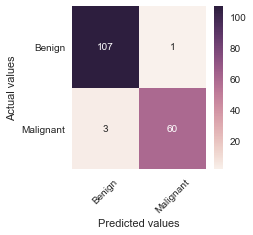

In [161]:
classes=['Benign','Malignant']
df_cm=pd.DataFrame(cm,index=classes,columns=classes)
fig=plt.figure(figsize=(3,3))
sns.heatmap(df_cm,annot=True,fmt='d')
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.xlabel('Predicted values')
plt.ylabel('Actual values');

In [162]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       108
          1       0.98      0.95      0.97        63

avg / total       0.98      0.98      0.98       171



###  Visualizing the SVM Boundary

Based on the best classifier that we got from our optimization process we would now try to visualize the decision boundary of the SVM. In order to visualize the SVM decision boundary we need to reduce the multi-dimensional data to two dimension. We will resort to applying the linear PCA transformation that will transofrm our data to a lower dimensional subspace (from 30D to 2D in this case).

In [163]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
Xs_train_pca=pca.fit_transform(Xs_train)

In [164]:
# Take the first two PCA features. We could avoid this by using a two-dim dataset
X=Xs_train_pca
y=y_train

In [165]:
def make_meshgrid(x,y,h=0.2):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))
    return xx,yy

In [202]:
def plot_contours(ax,clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=ax.contourf(xx,yy,Z,**params)
    return out
    

In [203]:
# create a mesh of values from the 1st two PCA components
X0,X1=X[:,0],X[:,1]
xx,yy=make_meshgrid(X0,X1)

In [204]:
clf=best_clf
clf.fit(X,y)

SVC(C=0.10000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

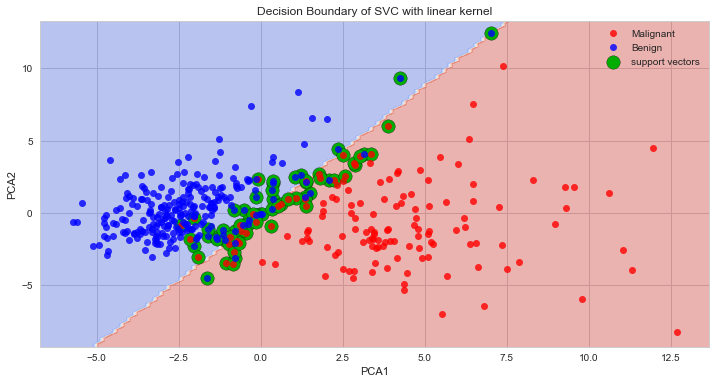

In [215]:
fig,ax=plt.subplots(figsize=(12,6))
plot_contours(ax,clf,xx,yy,cmap=plt.cm.coolwarm,alpha=0.4)

plt.plot(Xs_train_pca[y_train==1][:,0],Xs_train_pca[y_train==1][:,1],'ro',alpha=0.8,markeredgecolor='k',label='Malignant',)
plt.plot(Xs_train_pca[y_train==0][:,0],Xs_train_pca[y_train==0][:,1],'bo',alpha=0.8,markeredgecolor='k',label='Benign')

svs=clf.support_vectors_
plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#00AD00',edgecolor='k',label='support vectors')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Decision Boundary of SVC with linear kernel')
plt.legend()


##  Automate the ML process using pipelines 

There are standard workflows in a machine learning project that can be automated. In Python `scikit-learn`, Pipelines help to clearly define and automate these workflows.
* Pipelines help overcome common problems like data leakage in our test harness. 
* Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.
* Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

###  Data Preparation and Modeling Pipeline

####  Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data. Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models  
4. Select the best model

#### Validation Dataset

In [216]:
data=pd.read_csv('data/data.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419              0.07871        1.0950      0.9053         8.589   
1         0.1812              0.05667        0.5435      0.7339         3.398   
2         0.2069              0.05999        0.7456      0.7869         4.585   
3         0.2597              0.09744        0.4956      1.1560         3.445   
4         0.1809              0.05883        0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003             0.006193          25.38          17.33   
1      0.01389             0.003532          24.99          23.41   
2      0.02250             0.004571          23.57          25.53   
3      0.05963             0.009208          14.91          26.50   
4      0.01756             0.005115          22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119               0.2654           0.4601   
1           0.2416               0.1860           0.2750   
2           0.4504               0.2430           0.3613   
3           0.6869               0.2575           0.6638   
4           0.4000               0.1625           0.2364   

   fractal_dimension_worst  
0              0.11890      
1              0.08902      
2              0.08758      
3              0.17300      
4              0.07678

In [217]:
data.drop('id',axis=1,inplace=True)

In [218]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [219]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['diagnosis']=encoder.fit_transform(data['diagnosis'])

In [220]:
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7,stratify=y)

In [224]:
# Normalize the  data (center around 0 and scale to remove the variance).
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xs_train=scaler.fit_transform(X_train)

###  Evaluate Algorithms: Baseline

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold


from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.decomposition import PCA


from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [233]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('svc',SVC()))


num_folds=10
scoring='accuracy'
num_instances=len(X_train)
results=[]
names=[]


for name, model in models:
    kf=KFold(n_splits=10,random_state=random_state)
    cv_results=cross_val_score(model,X_train,y_train,scoring=scoring,cv=kf,n_jobs=-1)
    results.append(cv_results)
    names.append(name)

In [239]:
print('10 fold cross validation accuracy score for training data set for all classifiers :')
print('\n')

for name, result in zip(names,results):
    print('%-10s :%.6f (%.6f)'%(name,result.mean(),result.std()))
    print('\n')

10 fold cross validation accuracy score for training data set for all classifiers :


LR         :0.952372 (0.041013)


CART       :0.947372 (0.034268)


KNN        :0.932179 (0.037324)


LDA        :0.967308 (0.035678)


NB         :0.937308 (0.042266)


svc        :0.627885 (0.070174)




**Observation**

The results suggest That both Logistic Regression and LDA may be worth further study. These are just mean accuracy values. It is always wise to look at the distribution of accuracy values calculated across cross validation folds. We can do that graphically using box and whisker plots.

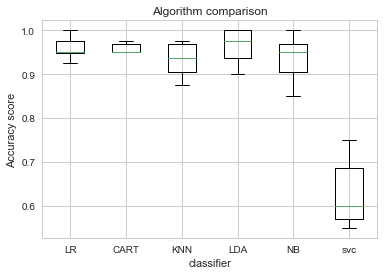

In [245]:
# Compare Algorithms
plt.boxplot(results)
plt.title('Algorithm comparison')
plt.xlabel('classifier')
plt.ylabel('Accuracy score')
plt.xticks(np.arange(len(names))+1,names);

In [246]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

**Observation**

The results show a similar tight distribution for all classifiers except SVM which is encouraging, suggesting low variance. The poor results for SVM are surprising.

It is possible the varied distribution of the attributes may have an effect on the accuracy of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized copy of the training dataset.

In [272]:
pipelines=[]

pipelines.append(('scaledLR',Pipeline([('scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('scaledCART',Pipeline([('scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('scaledKNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('scaledLDA',Pipeline([('scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('scaledNB',Pipeline([('scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('scaledSVC',Pipeline([('scaler',StandardScaler()),('svc',SVC())])))



num_folds=10
scoring='accuracy'

names=[]
results=[]

for name,model in pipelines:
    k_fold=KFold(n_splits=10,random_state=random_state)
    cv_results=cross_val_score(model,X_train,y_train,scoring=scoring,cv=k_fold,n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    
 

In [275]:
print('10 fold cross validation accuracy score for standardized training data for all classifiers :')
print('\n')

for name,result in zip(names,results):
    print('%-10s : %.6f (%.6f) '%(name,result.mean(),result.std()))


10 fold cross validation accuracy score for standardized training data for all classifiers :


scaledLR   : 0.984936 (0.022942) 
scaledCART : 0.952372 (0.030529) 
scaledKNN  : 0.952179 (0.038156) 
scaledLDA  : 0.967308 (0.035678) 
scaledNB   : 0.937244 (0.043887) 
scaledSVC  : 0.969936 (0.038398) 


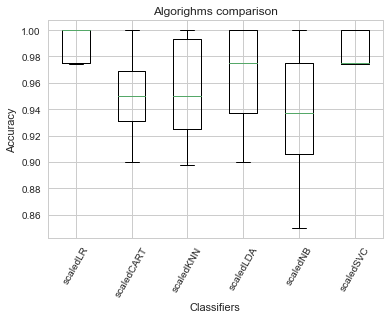

In [285]:
#compare algorithms
plt.title('Algorighms comparison')
plt.boxplot(results)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(names))+1,names,rotation=60);


**Observations**

The results show that standardization of the data has lifted the skill of SVM to be the most accurate algorithm tested so far.

The results suggest digging deeper into the SVM and LDA and LR algorithms. It is very likely that configuration beyond the default may yield even more accurate models.

###  Algorithm Tuning
In this section we investigate tuning the parameters for three algorithms that show promise from the spot-checking in the previous section: LR, LDA and SVM.

#### Tuning hyper-parameters - SVC estimator

In [308]:
# Make Support Vector Classifier Pipeline
pipeline_svc=Pipeline([('scaler',StandardScaler()),
                      ('pca',PCA(n_components=2)),
                      ('svc',SVC(probability=True,verbose=False))])

In [309]:
# Fit Pipeline to training data and score
scores=cross_val_score(pipeline_svc,X_train,y_train,cv=10,verbose=False,n_jobs=-1)
print('Training accuracy is %.3f +/- %.3f '%(np.mean(scores),np.std(results)))

Training accuracy is 0.942 +/- 0.039 


In [311]:
# Tune Hyperparameters

param_range=[0.0001,0.001,0.01,0.1,1,10,100,1000]
param_grid=[{'svc__C':param_range,'svc__kernel':['linear','rbf'],'svc__gamma':param_range}]

gs_svc=GridSearchCV(estimator=pipeline_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)

gs_svc.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'svc__kernel': ['linear', 'rbf'], 'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [318]:
print('SVC best parameters :',gs_svc.best_params_)
print('SVC best socre :',gs_svc.best_score_)

SVC best parameters : {'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kernel': 'linear'}
SVC best socre : 0.957286432161


In [313]:
gs_svc.best_estimator_.named_steps

{'pca': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svc': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
   max_iter=-1, probability=True, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [314]:
gs_svc.best_estimator_.named_steps['svc'].coef_

array([[ 1.57606226, -0.87384284]])

In [315]:
gs_svc.best_estimator_.named_steps['svc'].support_vectors_

array([[ -5.59298401e-03,   2.54545060e-02],
       [ -3.36380410e-01,  -2.57254998e-01],
       [ -3.38622032e-01,  -7.19898441e-01],
       [ -7.04681309e-01,  -2.09847293e+00],
       [ -1.29967755e+00,  -1.62913054e+00],
       [ -8.48983391e-02,  -1.45496113e-01],
       [ -4.64780833e-01,  -9.01859111e-01],
       [  1.42724855e+00,   1.42660623e+00],
       [ -7.60785538e-01,  -1.16034158e+00],
       [  2.88483593e+00,   4.20900482e+00],
       [  1.94950775e+00,   2.36149488e+00],
       [ -1.54668166e+00,  -4.47823571e+00],
       [ -1.05181400e+00,  -1.30862774e+00],
       [  6.53277729e+00,   1.24974670e+01],
       [ -1.18800512e+00,  -1.55908705e+00],
       [ -6.16694586e-01,  -1.43967224e+00],
       [ -6.72611104e-01,  -1.22372306e+00],
       [  2.19235999e+00,   4.45143040e+00],
       [  1.27634550e+00,   1.13317453e+00],
       [ -4.60409592e-01,  -2.02632100e-01],
       [  5.54733653e-02,  -4.71520085e-02],
       [  1.33960706e+00,   2.17971509e+00],
       [  

### Tuning the hyper-parameters - k-NN hyperparameters
 For our standard k-NN implementation, there are two primary hyperparameters that we’ll want to tune:

* The number of neighbors k.
* The distance metric/similarity function.

Both of these values can dramatically affect the accuracy of our k-NN classifier. Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric. In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times. Each time, the n_neighbors parameter should be given a different value from the list.

We can't give `GridSearchCV` just a list  
We've to specify `n_neighbors` should take on 1 through 30  
We can set `n_jobs` = -1 to run computations in parallel (if supported by your computer and OS) 

In [319]:
pipeline_knn=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('knn',KNeighborsClassifier())])

In [321]:
#Fit Pipeline to training data and score
scores=cross_val_score(pipeline_knn,X_train,y_train,scoring='accuracy',cv=10,n_jobs=-1)

print('KNN model accuracy :%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

KNN model accuracy :0.945 +/- 0.027


In [324]:
# Tune Hyperparameters
param_range=range(1,31)
param_grid={'knn__n_neighbors':param_range}

gs_knn=GridSearchCV(pipeline_knn,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=10)
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=10,
       param_grid={'knn__n_neighbors': range(1, 31)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [326]:
print('KNN best parameters :',gs_knn.best_params_)
print('KNN best score :',gs_knn.best_score_)

KNN best parameters : {'knn__n_neighbors': 6}
KNN best score : 0.947236180905


###  Finalize Model

In [327]:
final_svc=gs_svc.best_estimator_

# Get Final Scores
scores=cross_val_score(final_svc,X_train,y_train,scoring='accuracy',cv=10,n_jobs=10)


In [329]:
print('Final SVC model scores :%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

print('Final accuracy on Test set :',final_svc.score(X_test,y_test))

Final SVC model scores :0.945 +/- 0.027
Final accuracy on Test set : 0.953216374269


In [330]:
y_pred=final_svc.predict(X_test)

In [332]:
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [335]:
print('Accuracy score :',accuracy)

Accuracy score : 0.953216374269


In [337]:
print( 'Confusion_matrix :','\n',cm)

Confusion_matrix : 
 [[105   2]
 [  6  58]]


In [339]:
print('Classification Report :','\n',cr)

Classification Report : 
              precision    recall  f1-score   support

          0       0.95      0.98      0.96       107
          1       0.97      0.91      0.94        64

avg / total       0.95      0.95      0.95       171

